Importing data

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Read the CSV file
# The file has two columns: timestamp and a JSON string containing sensor data
df_raw = pd.read_csv(r'Data\batch_one_data.csv', header=None, names=['timestamp', 'json_data'])

# Parse the JSON strings in the second column
# First, we'll create a function to parse each JSON string
def parse_json_data(json_str):
    try:
        # Remove any escape characters that might cause issues
        clean_json = json_str.replace('\\"', '"')
        return json.loads(clean_json)
    except Exception as e:
        print(f"Error parsing JSON: {e}")
        return {}

# Apply the function to each row and normalize the resulting JSON data
json_data = df_raw['json_data'].apply(parse_json_data)
df_sensors = pd.json_normalize(json_data)

# Convert the timestamp column to datetime objects
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'])

# Combine the timestamp with the sensor data
df = pd.concat([df_raw['timestamp'], df_sensors], axis=1)

# Display basic information about the data
print(f"Data shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

print("\nSummary statistics:")
display(df.describe())

# Check for any missing values
print(f"\nMissing values in each column:\n{df.isnull().sum()}")

Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error parsing JSON: Expecting value: line 1 column 115 (char 114)
Error pars

,timestamp,time,BME_Temp,BME_Humidity,BME_VOC_Ohm,MQ3_Bottom_Analog,MQ3_Bottom_PPM,MQ3_Top_Analog,MQ3_Top_PPM
0,2025-06-13 17:02:00,425845.0,29.42,78.76,3.16,0.0,0.0,165.0,0.03
1,2025-06-13 17:03:00,485845.0,29.38,78.51,3.15,77.0,0.0,220.0,0.07
2,2025-06-13 17:04:00,545845.0,29.35,78.52,3.16,10.0,0.0,179.0,0.04
3,2025-06-13 17:05:00,605845.0,29.32,78.36,3.15,64.0,0.0,215.0,0.06
4,2025-06-13 17:06:00,665845.0,29.31,78.54,3.15,49.0,0.0,233.0,0.08



Summary statistics:


,time,BME_Temp,BME_Humidity,BME_VOC_Ohm,MQ3_Bottom_Analog,MQ3_Bottom_PPM,MQ3_Top_Analog,MQ3_Top_PPM
count,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3.534000e+03
mean,487884.421619,27.215518,77.831726,3.044842,634.689021,652.377417,830.459253,2.408358e+08
std,258123.771861,0.674232,2.224576,0.327958,752.364908,5699.370993,787.338836,1.368136e+10
min,65410.000000,24.880000,74.200000,2.650000,0.000000,0.000000,0.000000,0.000000e+00
25%,245847.000000,26.860000,75.250000,2.750000,48.000000,0.000000,211.000000,6.000000e-02
50%,485845.000000,27.125000,79.210000,3.020000,359.000000,0.250000,584.000000,1.510000e+00
75%,725841.000000,27.410000,79.700000,3.180000,965.750000,7.142500,1185.000000,1.972000e+01
max,906150.000000,29.960000,80.410000,4.420000,3712.000000,140300.080000,4093.000000,8.125886e+11



Missing values in each column:
timestamp              0
time                 354
BME_Temp             354
BME_Humidity         354
BME_VOC_Ohm          354
MQ3_Bottom_Analog    354
MQ3_Bottom_PPM       354
MQ3_Top_Analog       354
MQ3_Top_PPM          354
dtype: int64


Plotting of Raw data

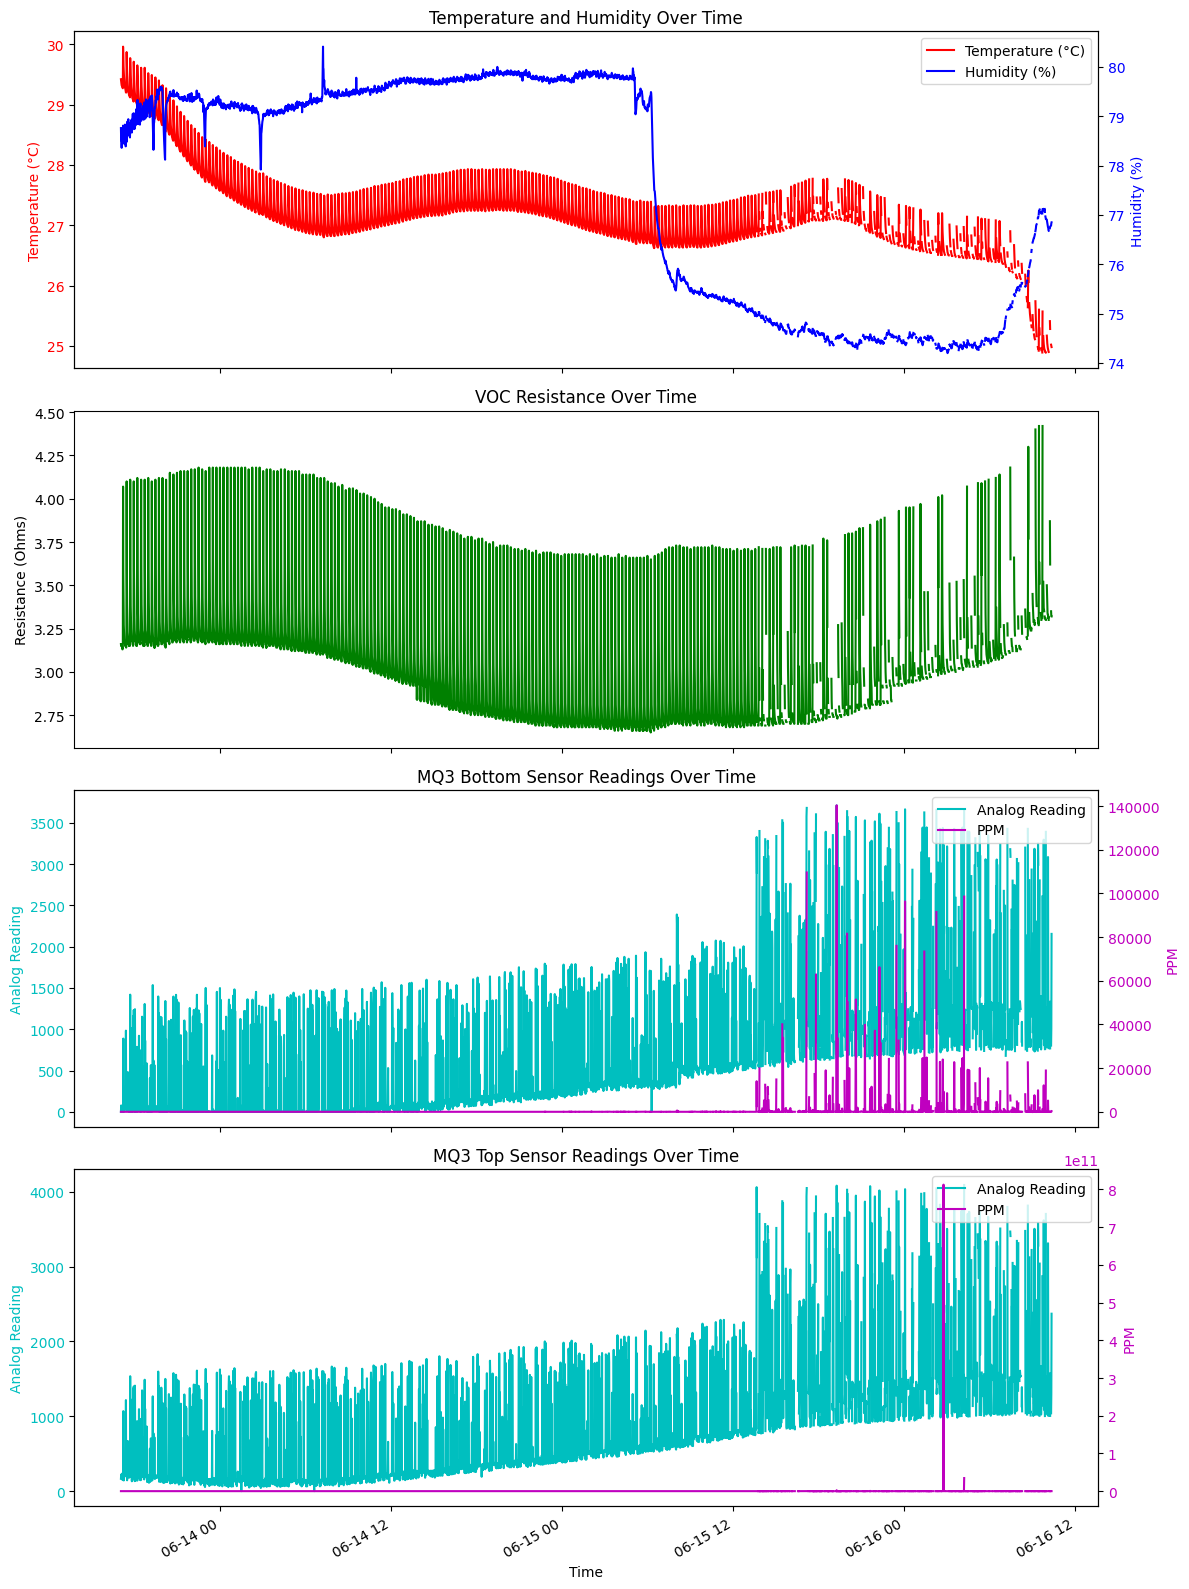

In [2]:
# Set up the figure with subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)
fig.subplots_adjust(hspace=0.3)  # Add some space between subplots

# Plot 1: Temperature and humidity
ax1 = axes[0]
ax1.plot(df['timestamp'], df['BME_Temp'], 'r-', label='Temperature (°C)')
ax1.set_ylabel('Temperature (°C)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for humidity
ax1_twin = ax1.twinx()
ax1_twin.plot(df['timestamp'], df['BME_Humidity'], 'b-', label='Humidity (%)')
ax1_twin.set_ylabel('Humidity (%)', color='b')
ax1_twin.tick_params(axis='y', labelcolor='b')

# Add title and legend
ax1.set_title('Temperature and Humidity Over Time')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Plot 2: VOC Resistance
ax2 = axes[1]
ax2.plot(df['timestamp'], df['BME_VOC_Ohm'], 'g-')
ax2.set_title('VOC Resistance Over Time')
ax2.set_ylabel('Resistance (Ohms)')

# Plot 3: MQ3 Bottom Sensor (Analog and PPM)
ax3 = axes[2]
ax3.plot(df['timestamp'], df['MQ3_Bottom_Analog'], 'c-', label='Analog Reading')
ax3.set_ylabel('Analog Reading', color='c')
ax3.tick_params(axis='y', labelcolor='c')

# Create a second y-axis for PPM
ax3_twin = ax3.twinx()
ax3_twin.plot(df['timestamp'], df['MQ3_Bottom_PPM'], 'm-', label='PPM')
ax3_twin.set_ylabel('PPM', color='m')
ax3_twin.tick_params(axis='y', labelcolor='m')

# Add title and legend
ax3.set_title('MQ3 Bottom Sensor Readings Over Time')
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines3 + lines4, labels3 + labels4, loc='upper right')

# Plot 4: MQ3 Top Sensor (Analog and PPM)
ax4 = axes[3]
ax4.plot(df['timestamp'], df['MQ3_Top_Analog'], 'c-', label='Analog Reading')
ax4.set_ylabel('Analog Reading', color='c')
ax4.tick_params(axis='y', labelcolor='c')

# Create a second y-axis for PPM
ax4_twin = ax4.twinx()
ax4_twin.plot(df['timestamp'], df['MQ3_Top_PPM'], 'm-', label='PPM')
ax4_twin.set_ylabel('PPM', color='m')
ax4_twin.tick_params(axis='y', labelcolor='m')

# Add title and legend
ax4.set_title('MQ3 Top Sensor Readings Over Time')
ax4.set_xlabel('Time')
lines5, labels5 = ax4.get_legend_handles_labels()
lines6, labels6 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines5 + lines6, labels5 + labels6, loc='upper right')

# Format x-axis to display dates nicely
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()

Filtering the Data

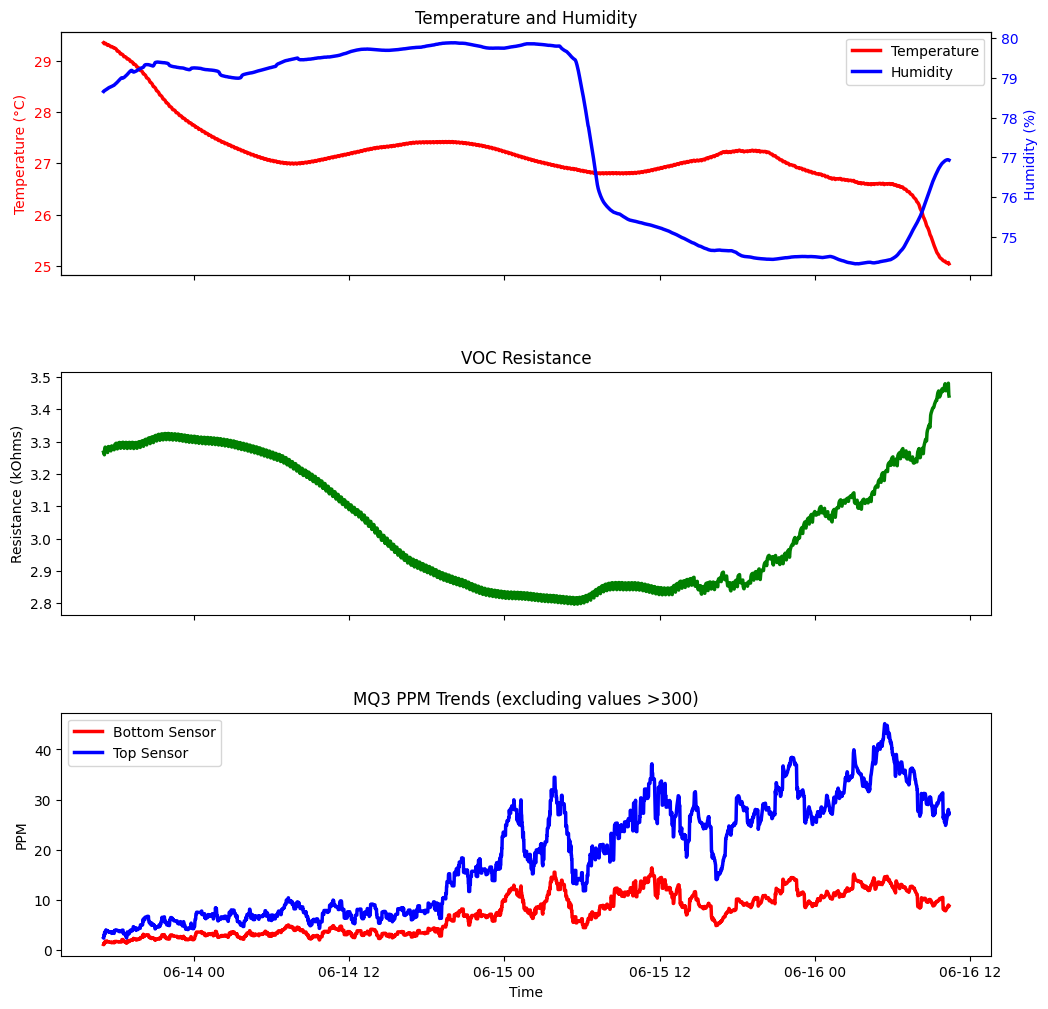

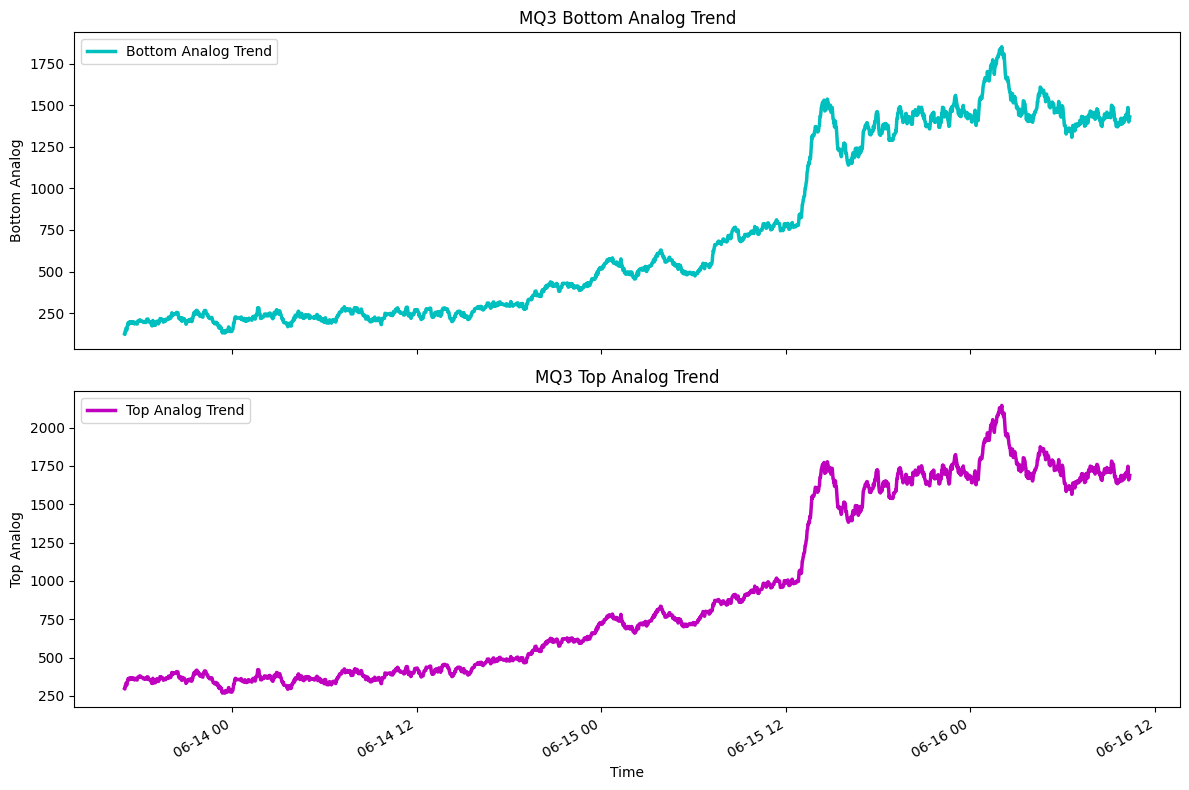

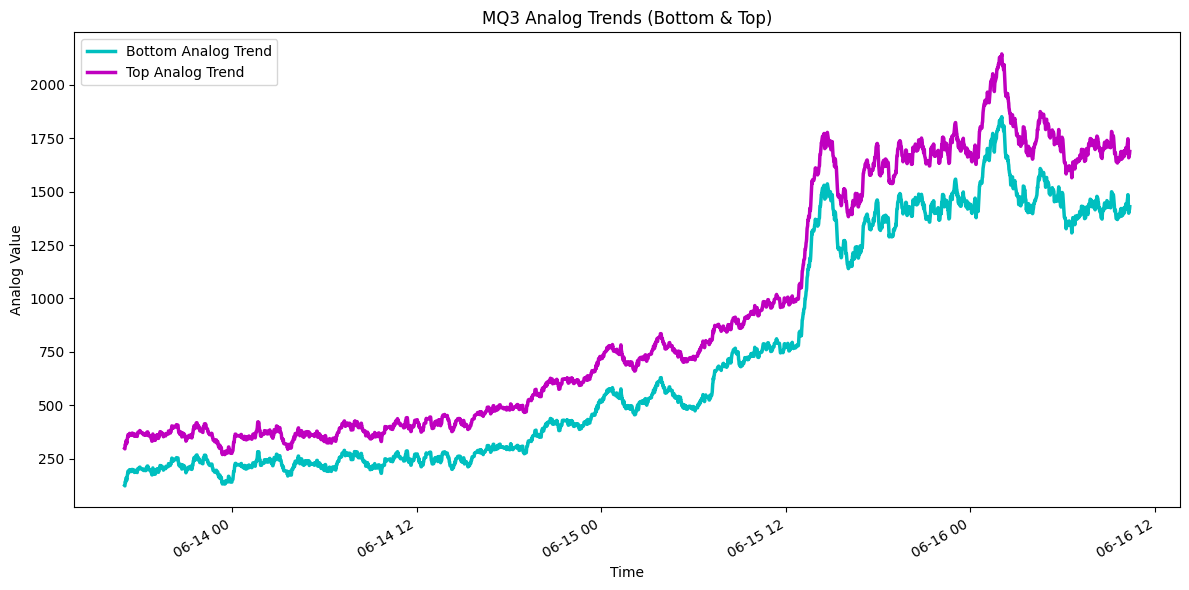

<Figure size 640x480 with 0 Axes>

Data analysis with outliers >300ppm excluded:

MQ3_Bottom_PPM:
  Range: 0.00 - 144.63 ppm
  Mean: 6.57 ppm

MQ3_Top_PPM:
  Range: 0.00 - 291.29 ppm
  Mean: 16.04 ppm

Number of outliers removed: 242


In [ ]:
# Create a clean copy of the dataframe
df_clean = df.copy()

# 1. Remove PPM outliers (values above 300 ppm)
ppm_threshold = 300  # Set a more appropriate threshold for expected normal values

# Find rows with outlier values
outlier_bottom_mask = df_clean['MQ3_Bottom_PPM'] > ppm_threshold
outlier_top_mask = df_clean['MQ3_Top_PPM'] > ppm_threshold
outlier_mask = outlier_bottom_mask | outlier_top_mask

# Replace outliers with NaN
df_clean.loc[outlier_mask, 'MQ3_Bottom_PPM'] = np.nan
df_clean.loc[outlier_mask, 'MQ3_Top_PPM'] = np.nan

# 2. Create simple trend lines using a strong smoothing filter
window_size = 150  # Adjust for desired smoothness

# Create columns for the trend lines
columns_to_trend = ['BME_Temp', 'BME_Humidity', 'BME_VOC_Ohm', 
                   'MQ3_Bottom_Analog', 'MQ3_Top_Analog',
                   'MQ3_Bottom_PPM', 'MQ3_Top_PPM']

# Apply simple moving average with larger window for smoother trend lines
for column in columns_to_trend:
    # Handle any NaN values first with forward fill, then backward fill
    temp_series = df_clean[column].fillna(method='ffill').fillna(method='bfill')
    
    # Apply strong smoothing
    df_clean[f'{column}_trend'] = temp_series.rolling(
        window=window_size, center=True, min_periods=1
    ).mean()

# 3. Create simple plots focusing only on trend lines
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
fig.subplots_adjust(hspace=0.4)

# Plot 1: Temperature and Humidity Trends
ax1 = axes[0]
ax1.plot(df_clean['timestamp'], df_clean['BME_Temp_trend'], 'r-', linewidth=2.5, label='Temperature')
ax1.set_ylabel('Temperature (°C)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax1_twin = ax1.twinx()
ax1_twin.plot(df_clean['timestamp'], df_clean['BME_Humidity_trend'], 'b-', linewidth=2.5, label='Humidity')
ax1_twin.set_ylabel('Humidity (%)', color='b')
ax1_twin.tick_params(axis='y', labelcolor='b')

ax1.set_title('Temperature and Humidity')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Plot 2: VOC Resistance Trend
ax2 = axes[1]
ax2.plot(df_clean['timestamp'], df_clean['BME_VOC_Ohm_trend'], 'g-', linewidth=2.5)
ax2.set_title('VOC Resistance')
ax2.set_ylabel('Resistance (kOhms)')

# Plot 3: PPM Values (excluding outliers)
ax3 = axes[2]
ax3.plot(df_clean['timestamp'], df_clean['MQ3_Bottom_PPM_trend'], 'r-', linewidth=2.5, label='Bottom Sensor')
ax3.plot(df_clean['timestamp'], df_clean['MQ3_Top_PPM_trend'], 'b-', linewidth=2.5, label='Top Sensor')
ax3.set_title(f'MQ3 PPM Trends (excluding values >{ppm_threshold})')
ax3.set_ylabel('PPM')
ax3.set_xlabel('Time')
ax3.legend()

# 4. Plot Analog Values with Trend Lines
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.subplots_adjust(hspace=0.4)

# Plot 1: MQ3 Bottom Analog Trend
axes[0].plot(df_clean['timestamp'], df_clean['MQ3_Bottom_Analog_trend'], 'c-', linewidth=2.5, label='Bottom Analog Trend')
axes[0].set_ylabel('Bottom Analog')
axes[0].set_title('MQ3 Bottom Analog Trend')
axes[0].legend()

# Plot 2: MQ3 Top Analog Trend
axes[1].plot(df_clean['timestamp'], df_clean['MQ3_Top_Analog_trend'], 'm-', linewidth=2.5, label='Top Analog Trend')
axes[1].set_ylabel('Top Analog')
axes[1].set_title('MQ3 Top Analog Trend')
axes[1].set_xlabel('Time')
axes[1].legend()

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# 5. Plot both Analog Trends together for comparison
plt.figure(figsize=(12, 6))
plt.plot(df_clean['timestamp'], df_clean['MQ3_Bottom_Analog_trend'], 'c-', linewidth=2.5, label='Bottom Analog Trend')
plt.plot(df_clean['timestamp'], df_clean['MQ3_Top_Analog_trend'], 'm-', linewidth=2.5, label='Top Analog Trend')
plt.ylabel('Analog Value')
plt.title('MQ3 Analog Trends (Bottom & Top)')
plt.xlabel('Time')
plt.legend()
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# Format x-axis to display dates nicely
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# Report statistics
print(f"Data analysis with outliers >{ppm_threshold}ppm excluded:")
for column in ['MQ3_Bottom_PPM', 'MQ3_Top_PPM']:
    non_outlier_values = df_clean[column].dropna()
    print(f"\n{column}:")
    if len(non_outlier_values) > 0:
        print(f"  Range: {non_outlier_values.min():.2f} - {non_outlier_values.max():.2f} ppm")
        print(f"  Mean: {non_outlier_values.mean():.2f} ppm")
    else:
        print("  No non-outlier values found")

# Count the outliers
outlier_count = outlier_mask.sum()
if outlier_count > 0:
    print(f"\nNumber of outliers removed: {outlier_count}")

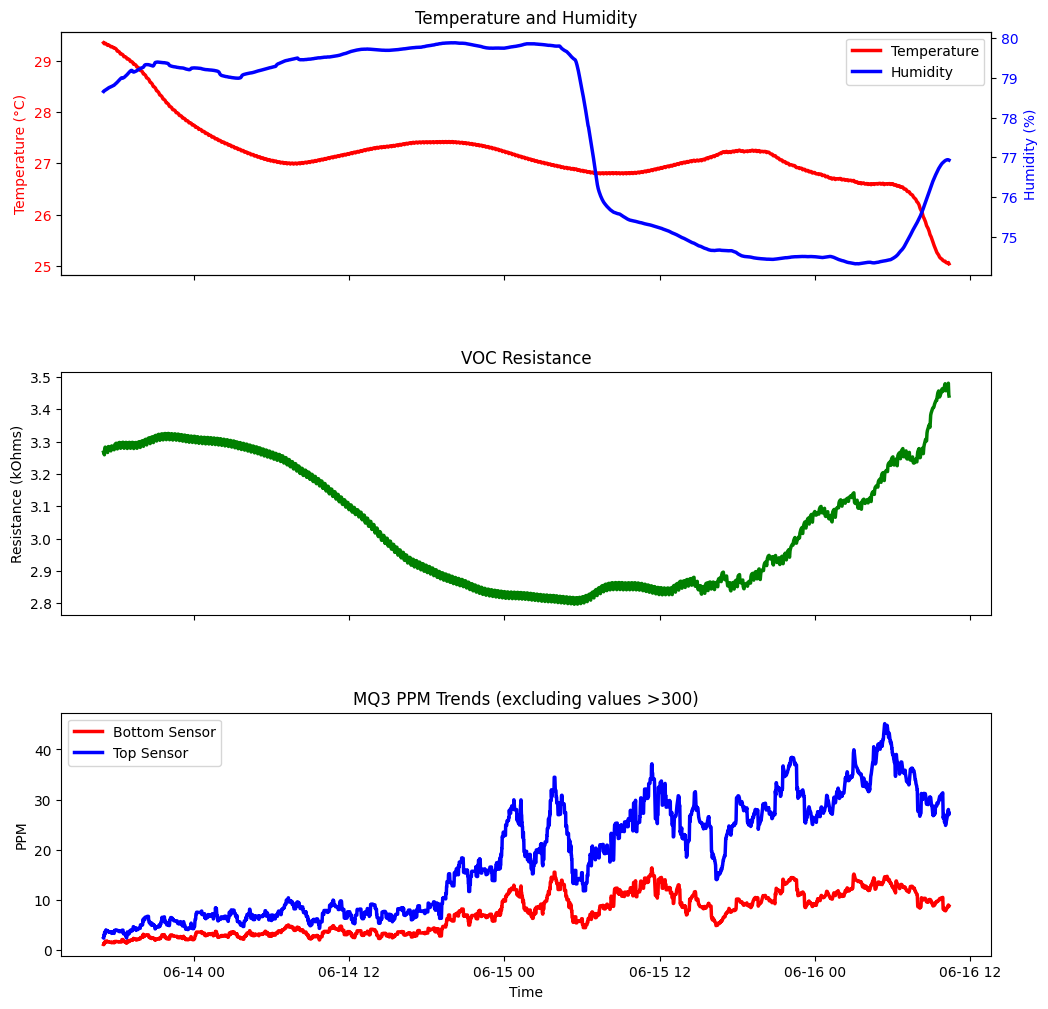

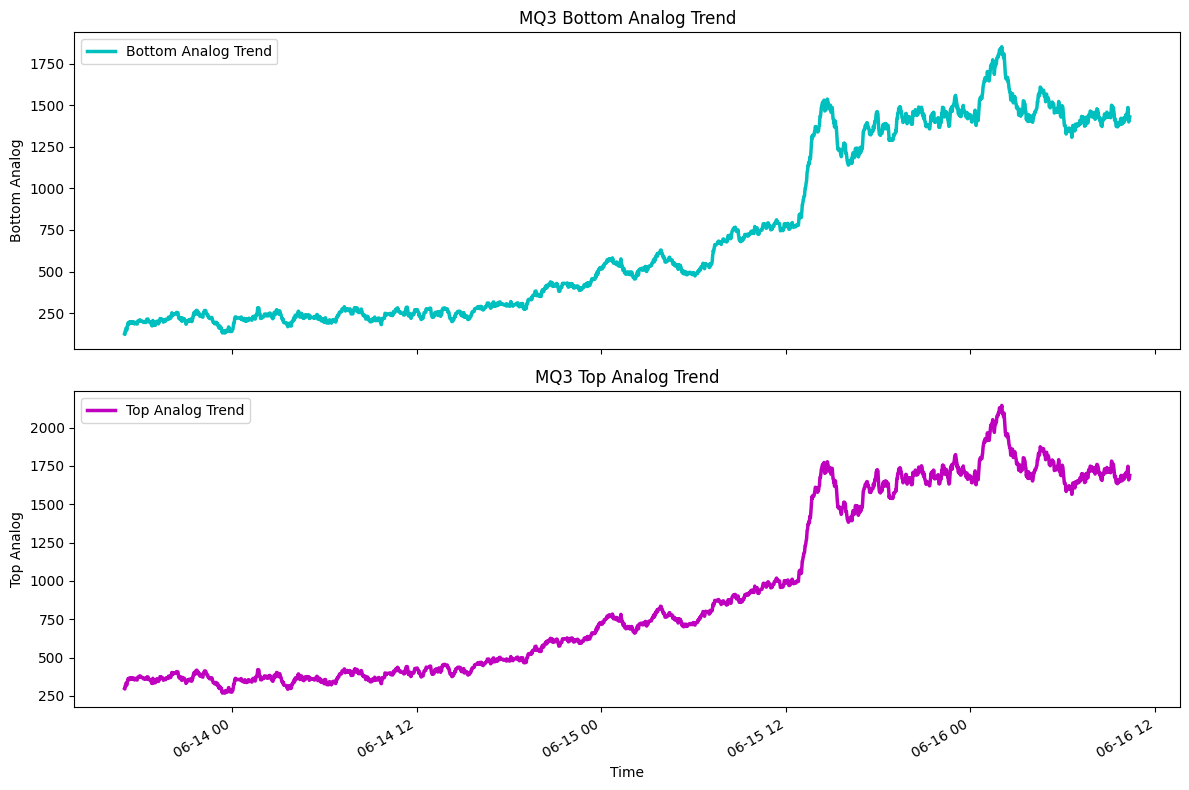

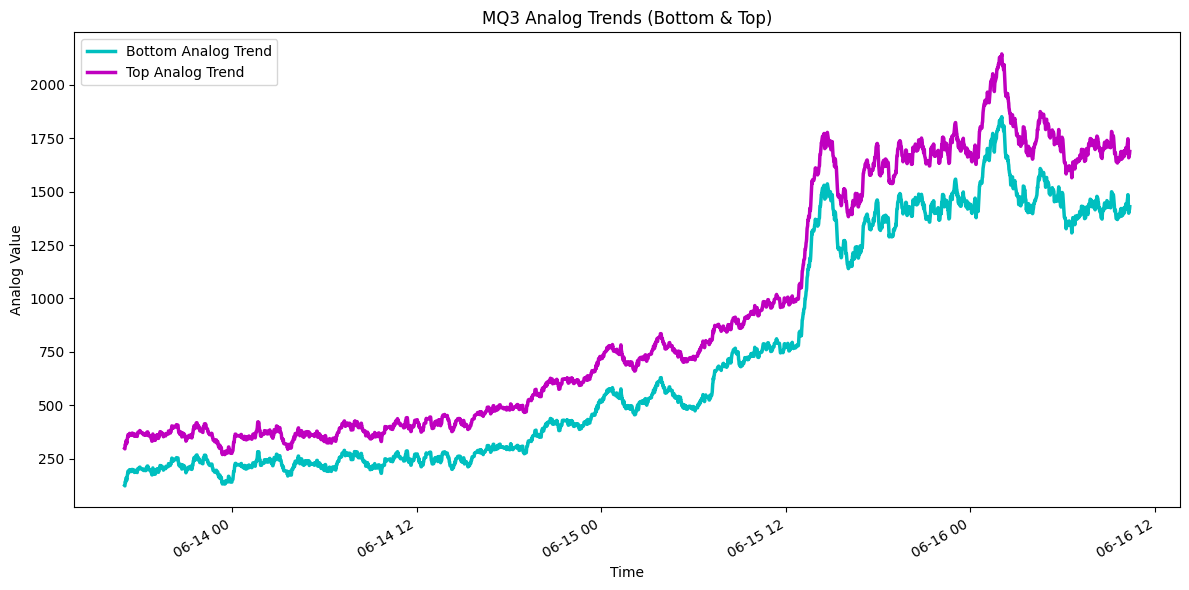

<Figure size 640x480 with 0 Axes>

Data analysis with outliers >300ppm excluded:

MQ3_Bottom_PPM:
  Range: 0.00 - 144.63 ppm
  Mean: 6.57 ppm

MQ3_Top_PPM:
  Range: 0.00 - 291.29 ppm
  Mean: 16.04 ppm

Number of outliers removed: 242


In [4]:
# Read the filtered data from the CSV file
import pandas as pd

df_filtered = pd.read_csv('data/batch_one_filtered.csv', parse_dates=['Timestamp'])

# 3. Create simple plots focusing only on trend lines
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
fig.subplots_adjust(hspace=0.4)

# Plot 1: Temperature and Humidity Trends
ax1 = axes[0]
ax1.plot(df_clean['timestamp'], df_clean['BME_Temp_trend'], 'r-', linewidth=2.5, label='Temperature')
ax1.set_ylabel('Temperature (°C)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax1_twin = ax1.twinx()
ax1_twin.plot(df_clean['timestamp'], df_clean['BME_Humidity_trend'], 'b-', linewidth=2.5, label='Humidity')
ax1_twin.set_ylabel('Humidity (%)', color='b')
ax1_twin.tick_params(axis='y', labelcolor='b')

ax1.set_title('Temperature and Humidity')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Plot 2: VOC Resistance Trend
ax2 = axes[1]
ax2.plot(df_clean['timestamp'], df_clean['BME_VOC_Ohm_trend'], 'g-', linewidth=2.5)
ax2.set_title('VOC Resistance')
ax2.set_ylabel('Resistance (kOhms)')

# Plot 3: PPM Values (excluding outliers)
ax3 = axes[2]
ax3.plot(df_clean['timestamp'], df_clean['MQ3_Bottom_PPM_trend'], 'r-', linewidth=2.5, label='Bottom Sensor')
ax3.plot(df_clean['timestamp'], df_clean['MQ3_Top_PPM_trend'], 'b-', linewidth=2.5, label='Top Sensor')
ax3.set_title(f'MQ3 PPM Trends (excluding values >{ppm_threshold})')
ax3.set_ylabel('PPM')
ax3.set_xlabel('Time')
ax3.legend()

# 4. Plot Analog Values with Trend Lines
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.subplots_adjust(hspace=0.4)

# Plot 1: MQ3 Bottom Analog Trend
axes[0].plot(df_clean['timestamp'], df_clean['MQ3_Bottom_Analog_trend'], 'c-', linewidth=2.5, label='Bottom Analog Trend')
axes[0].set_ylabel('Bottom Analog')
axes[0].set_title('MQ3 Bottom Analog Trend')
axes[0].legend()

# Plot 2: MQ3 Top Analog Trend
axes[1].plot(df_clean['timestamp'], df_clean['MQ3_Top_Analog_trend'], 'm-', linewidth=2.5, label='Top Analog Trend')
axes[1].set_ylabel('Top Analog')
axes[1].set_title('MQ3 Top Analog Trend')
axes[1].set_xlabel('Time')
axes[1].legend()

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# 5. Plot both Analog Trends together for comparison
plt.figure(figsize=(12, 6))
plt.plot(df_clean['timestamp'], df_clean['MQ3_Bottom_Analog_trend'], 'c-', linewidth=2.5, label='Bottom Analog Trend')
plt.plot(df_clean['timestamp'], df_clean['MQ3_Top_Analog_trend'], 'm-', linewidth=2.5, label='Top Analog Trend')
plt.ylabel('Analog Value')
plt.title('MQ3 Analog Trends (Bottom & Top)')
plt.xlabel('Time')
plt.legend()
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# Format x-axis to display dates nicely
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# Report statistics
print(f"Data analysis with outliers >{ppm_threshold}ppm excluded:")
for column in ['MQ3_Bottom_PPM', 'MQ3_Top_PPM']:
    non_outlier_values = df_clean[column].dropna()
    print(f"\n{column}:")
    if len(non_outlier_values) > 0:
        print(f"  Range: {non_outlier_values.min():.2f} - {non_outlier_values.max():.2f} ppm")
        print(f"  Mean: {non_outlier_values.mean():.2f} ppm")
    else:
        print("  No non-outlier values found")

# Count the outliers
outlier_count = outlier_mask.sum()
if outlier_count > 0:
    print(f"\nNumber of outliers removed: {outlier_count}")

PPM and Analog Comparison

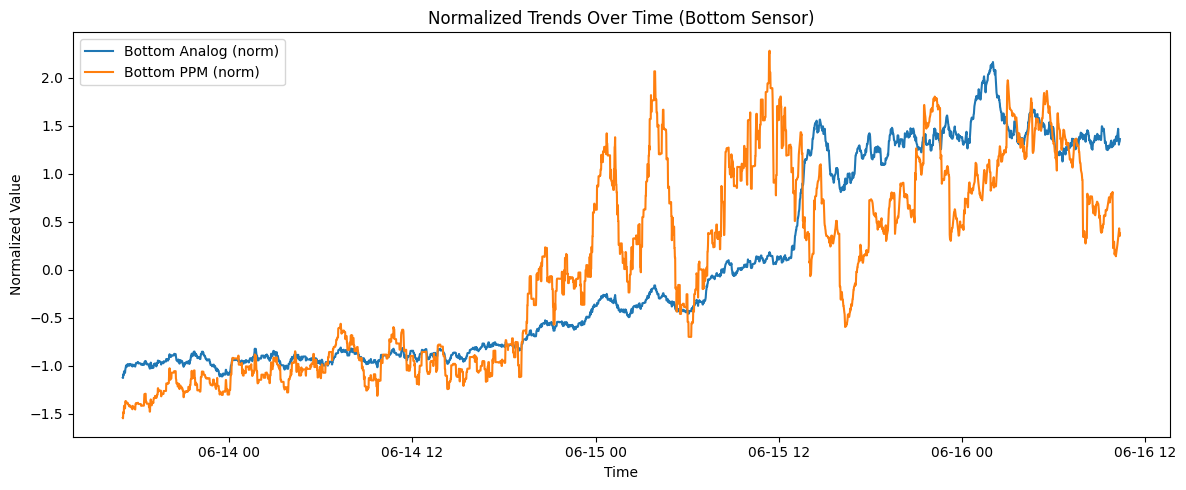

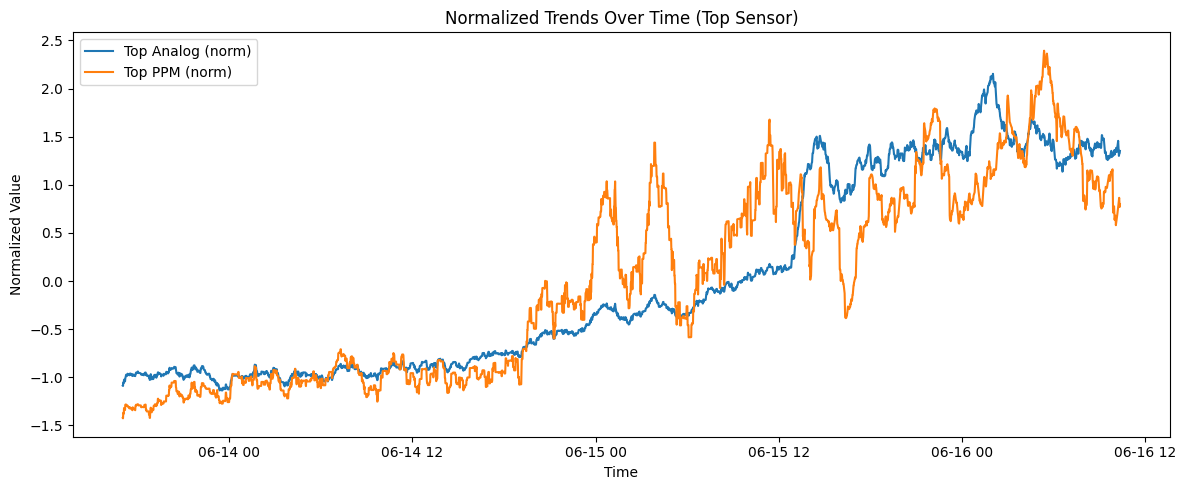

Correlation (Bottom Analog vs Bottom PPM, normalized): 0.78
Correlation (Top Analog vs Top PPM, normalized): 0.88


In [5]:
# Normalize (z-score) the trends for comparison
from scipy.stats import zscore

df_clean['Bottom_Analog_norm'] = zscore(df_clean['MQ3_Bottom_Analog_trend'].fillna(method='ffill'))
df_clean['Bottom_PPM_norm'] = zscore(df_clean['MQ3_Bottom_PPM_trend'].fillna(method='ffill'))
df_clean['Top_Analog_norm'] = zscore(df_clean['MQ3_Top_Analog_trend'].fillna(method='ffill'))
df_clean['Top_PPM_norm'] = zscore(df_clean['MQ3_Top_PPM_trend'].fillna(method='ffill'))

# Plot normalized trends over time for Bottom sensor
plt.figure(figsize=(12,5))
plt.plot(df_clean['timestamp'], df_clean['Bottom_Analog_norm'], label='Bottom Analog (norm)')
plt.plot(df_clean['timestamp'], df_clean['Bottom_PPM_norm'], label='Bottom PPM (norm)')
plt.title('Normalized Trends Over Time (Bottom Sensor)')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.tight_layout()
plt.show()

# Plot normalized trends over time for Top sensor
plt.figure(figsize=(12,5))
plt.plot(df_clean['timestamp'], df_clean['Top_Analog_norm'], label='Top Analog (norm)')
plt.plot(df_clean['timestamp'], df_clean['Top_PPM_norm'], label='Top PPM (norm)')
plt.title('Normalized Trends Over Time (Top Sensor)')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and print correlation coefficients
bottom_corr = np.corrcoef(df_clean['Bottom_Analog_norm'], df_clean['Bottom_PPM_norm'])[0,1]
top_corr = np.corrcoef(df_clean['Top_Analog_norm'], df_clean['Top_PPM_norm'])[0,1]
print(f"Correlation (Bottom Analog vs Bottom PPM, normalized): {bottom_corr:.2f}")
print(f"Correlation (Top Analog vs Top PPM, normalized): {top_corr:.2f}")

Trying to tune the R0 values of the sensors to get better trends to the analog values only for ML purposes. (As using this as truth fundamentally rules out this data as scientifically accurate)

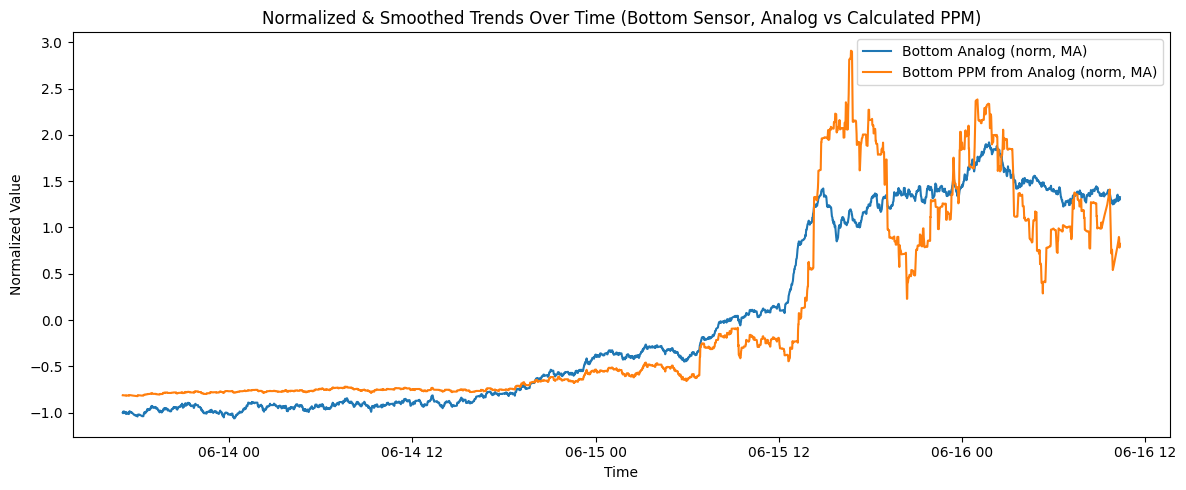

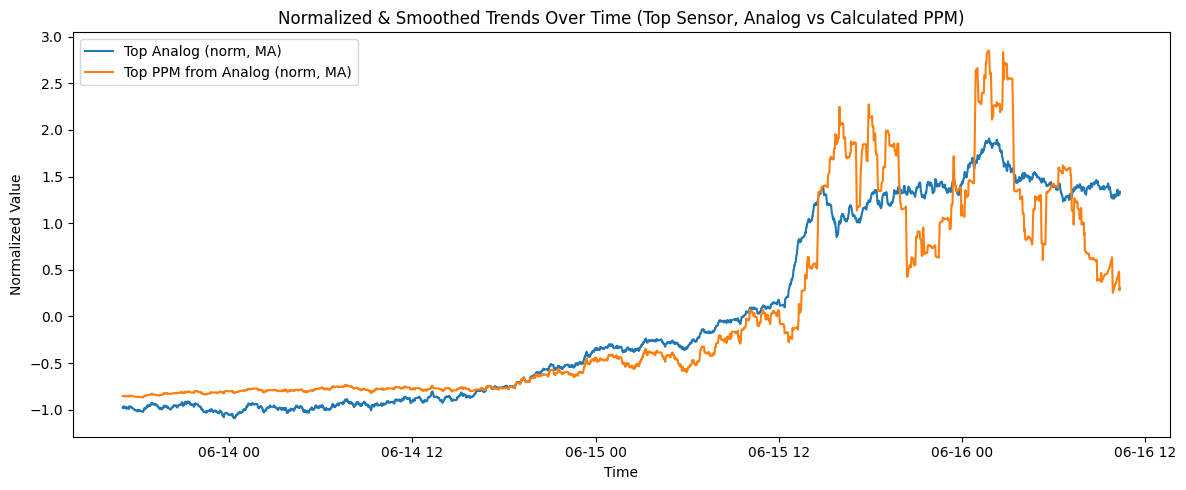

Correlation (Bottom Analog vs Bottom PPM from Analog, normalized & smoothed): 0.93
Correlation (Top Analog vs Top PPM from Analog, normalized & smoothed): 0.93


In [6]:
# --- MQ-3 PPM conversion parameters (same as your Arduino code) ---
RL_VALUE = 10.0  # kOhms
Vc = 5.0         # Supply voltage
R0_MQ3_1 = 4.18  # Try different values here!
R0_MQ3_2 = 4.18  # Try different values here!
ppm_threshold = 300  # Exclude PPM values above this

def analog_to_ppm(analog_value, r0):
    # Protection against zero readings
    analog_value = np.maximum(analog_value, 1)
    sensor_voltage = analog_value * (Vc / 4095.0)
    sensor_voltage = np.maximum(sensor_voltage, 0.1)
    rs = ((Vc - sensor_voltage) / sensor_voltage) * RL_VALUE
    ratio = rs / r0
    ppm = 607.9 * np.power(ratio, -2.868)
    return ppm

# Calculate PPM from analog for both sensors
df_clean['Bottom_PPM_from_Analog'] = analog_to_ppm(df_clean['MQ3_Bottom_Analog'], R0_MQ3_1)
df_clean['Top_PPM_from_Analog'] = analog_to_ppm(df_clean['MQ3_Top_Analog'], R0_MQ3_2)

# Exclude PPM values above threshold
df_clean.loc[df_clean['Bottom_PPM_from_Analog'] > ppm_threshold, 'Bottom_PPM_from_Analog'] = np.nan
df_clean.loc[df_clean['Top_PPM_from_Analog'] > ppm_threshold, 'Top_PPM_from_Analog'] = np.nan

# Apply moving average filter (window=150) before normalization
window_size = 150

# Bottom sensor
bottom_analog_ma = df_clean['MQ3_Bottom_Analog'].fillna(method='ffill').rolling(window=window_size, center=True, min_periods=1).mean()
bottom_ppm_ma = df_clean['Bottom_PPM_from_Analog'].fillna(method='ffill').rolling(window=window_size, center=True, min_periods=1).mean()

# Top sensor
top_analog_ma = df_clean['MQ3_Top_Analog'].fillna(method='ffill').rolling(window=window_size, center=True, min_periods=1).mean()
top_ppm_ma = df_clean['Top_PPM_from_Analog'].fillna(method='ffill').rolling(window=window_size, center=True, min_periods=1).mean()

# Normalize the moving-averaged data
df_clean['Bottom_Analog_fromAnalog_norm_ma'] = zscore(bottom_analog_ma)
df_clean['Bottom_PPM_fromAnalog_norm_ma'] = zscore(bottom_ppm_ma)
df_clean['Top_Analog_fromAnalog_norm_ma'] = zscore(top_analog_ma)
df_clean['Top_PPM_fromAnalog_norm_ma'] = zscore(top_ppm_ma)

# Plot normalized, smoothed trends over time for Bottom sensor
plt.figure(figsize=(12,5))
plt.plot(df_clean['timestamp'], df_clean['Bottom_Analog_fromAnalog_norm_ma'], label='Bottom Analog (norm, MA)')
plt.plot(df_clean['timestamp'], df_clean['Bottom_PPM_fromAnalog_norm_ma'], label='Bottom PPM from Analog (norm, MA)')
plt.title('Normalized & Smoothed Trends Over Time (Bottom Sensor, Analog vs Calculated PPM)')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.tight_layout()
plt.show()

# Plot normalized, smoothed trends over time for Top sensor
plt.figure(figsize=(12,5))
plt.plot(df_clean['timestamp'], df_clean['Top_Analog_fromAnalog_norm_ma'], label='Top Analog (norm, MA)')
plt.plot(df_clean['timestamp'], df_clean['Top_PPM_fromAnalog_norm_ma'], label='Top PPM from Analog (norm, MA)')
plt.title('Normalized & Smoothed Trends Over Time (Top Sensor, Analog vs Calculated PPM)')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and print correlation coefficients for the smoothed, normalized data
bottom_corr_calc_ma = np.corrcoef(
    df_clean['Bottom_Analog_fromAnalog_norm_ma'].dropna(),
    df_clean['Bottom_PPM_fromAnalog_norm_ma'].dropna()
)[0,1]
top_corr_calc_ma = np.corrcoef(
    df_clean['Top_Analog_fromAnalog_norm_ma'].dropna(),
    df_clean['Top_PPM_fromAnalog_norm_ma'].dropna()
)[0,1]
print(f"Correlation (Bottom Analog vs Bottom PPM from Analog, normalized & smoothed): {bottom_corr_calc_ma:.2f}")
print(f"Correlation (Top Analog vs Top PPM from Analog, normalized & smoothed): {top_corr_calc_ma:.2f}")

Brainstorming ideas for features for machine learning

In [7]:
# Example: Add rolling mean, std, and rate of change for bottom analog
window = 150

df_clean['Bottom_Analog_MA'] = df_clean['MQ3_Bottom_Analog'].rolling(window=window, min_periods=1, center=True).mean()
df_clean['Bottom_Analog_STD'] = df_clean['MQ3_Bottom_Analog'].rolling(window=window, min_periods=1, center=True).std()
df_clean['Bottom_Analog_Diff'] = df_clean['MQ3_Bottom_Analog'].diff()

# Example: Difference between top and bottom analog
df_clean['Analog_Diff_Top_Bottom'] = df_clean['MQ3_Top_Analog'] - df_clean['MQ3_Bottom_Analog']

# Example: Rolling correlation between top and bottom analog
df_clean['Analog_Corr_Top_Bottom'] = df_clean['MQ3_Top_Analog'].rolling(window=window, min_periods=1).corr(df_clean['MQ3_Bottom_Analog'])

In [8]:
# --- Feature Engineering for ML/SVM ---

window = 150

# Rolling mean, std, and rate of change for analog and PPM (from analog conversion)
df_clean['Bottom_Analog_MA'] = df_clean['MQ3_Bottom_Analog'].rolling(window=window, min_periods=1, center=True).mean()
df_clean['Bottom_Analog_STD'] = df_clean['MQ3_Bottom_Analog'].rolling(window=window, min_periods=1, center=True).std()
df_clean['Bottom_Analog_Diff'] = df_clean['MQ3_Bottom_Analog'].diff()

df_clean['Top_Analog_MA'] = df_clean['MQ3_Top_Analog'].rolling(window=window, min_periods=1, center=True).mean()
df_clean['Top_Analog_STD'] = df_clean['MQ3_Top_Analog'].rolling(window=window, min_periods=1, center=True).std()
df_clean['Top_Analog_Diff'] = df_clean['MQ3_Top_Analog'].diff()

df_clean['Bottom_PPM_MA'] = df_clean['Bottom_PPM_from_Analog'].rolling(window=window, min_periods=1, center=True).mean()
df_clean['Bottom_PPM_STD'] = df_clean['Bottom_PPM_from_Analog'].rolling(window=window, min_periods=1, center=True).std()
df_clean['Bottom_PPM_Diff'] = df_clean['Bottom_PPM_from_Analog'].diff()

df_clean['Top_PPM_MA'] = df_clean['Top_PPM_from_Analog'].rolling(window=window, min_periods=1, center=True).mean()
df_clean['Top_PPM_STD'] = df_clean['Top_PPM_from_Analog'].rolling(window=window, min_periods=1, center=True).std()
df_clean['Top_PPM_Diff'] = df_clean['Top_PPM_from_Analog'].diff()

# Difference and ratio features
df_clean['Analog_Diff_Top_Bottom'] = df_clean['MQ3_Top_Analog'] - df_clean['MQ3_Bottom_Analog']
df_clean['Analog_Ratio_Top_Bottom'] = df_clean['MQ3_Top_Analog'] / (df_clean['MQ3_Bottom_Analog'] + 1e-6)
df_clean['PPM_Diff_Top_Bottom'] = df_clean['Top_PPM_from_Analog'] - df_clean['Bottom_PPM_from_Analog']
df_clean['PPM_Ratio_Top_Bottom'] = df_clean['Top_PPM_from_Analog'] / (df_clean['Bottom_PPM_from_Analog'] + 1e-6)

# Rolling correlation between top and bottom analog and PPM
df_clean['Analog_Corr_Top_Bottom'] = df_clean['MQ3_Top_Analog'].rolling(window=window, min_periods=1).corr(df_clean['MQ3_Bottom_Analog'])
df_clean['PPM_Corr_Top_Bottom'] = df_clean['Top_PPM_from_Analog'].rolling(window=window, min_periods=1).corr(df_clean['Bottom_PPM_from_Analog'])

# Environmental features
df_clean['Temp_MA'] = df_clean['BME_Temp'].rolling(window=window, min_periods=1, center=True).mean()
df_clean['Humidity_MA'] = df_clean['BME_Humidity'].rolling(window=window, min_periods=1, center=True).mean()
df_clean['VOC_MA'] = df_clean['BME_VOC_Ohm'].rolling(window=window, min_periods=1, center=True).mean()

# Time-based features (example: seconds since start)
df_clean['time_seconds'] = (df_clean['timestamp'] - df_clean['timestamp'].iloc[0]).dt.total_seconds()

# (Optional) Label for spoilage: You must create this based on your domain knowledge or experiment logs.
# Example: df_clean['spoilage'] = (df_clean['time_seconds'] > SOME_THRESHOLD).astype(int)

print("Feature engineering complete. Ready for SVM modeling.")

Feature engineering complete. Ready for SVM modeling.


Below

Fresh: Before 06-15 00:00 (flat trend)

Spoilage onset: Between 06-15 00:00 and 2023-06-15 12:00 (slow increase)

Spoiled: After 06-15 12:00 (progressively worse)

In [9]:
import pandas as pd

# Define the suspected spoilage intervals
fresh_end = pd.Timestamp('2023-06-15 00:00')
spoilage_onset_end = pd.Timestamp('2023-06-15 12:00')

def spoilage_label(ts):
    if ts < fresh_end:
        return 0  # Fresh
    elif ts < spoilage_onset_end:
        return 1  # Spoilage onset
    else:
        return 2  # Spoiled

df_clean['spoilage_label'] = df_clean['timestamp'].apply(spoilage_label)